In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/data.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataset = dataset.drop(["id"], axis = 1)

In [ ]:
dataset = dataset.drop(["Unnamed: 32"], axis = 1)

In [ ]:
M = dataset[dataset.diagnosis == "M"]


In [ ]:
B = dataset[dataset.diagnosis == "B"]


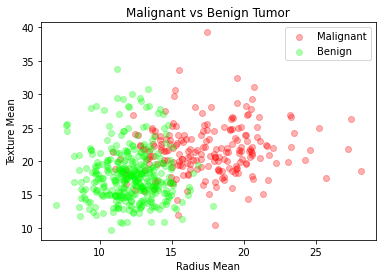

In [ ]:
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [ ]:
dataset.diagnosis = [1 if i == "M" else 0 for i in dataset.diagnosis]

In [ ]:
x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values

In [ ]:
#normalization
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
print("Naive Bayes score: ",nb.score(x_test, y_test)*100)

Naive Bayes score:  93.56725146198829


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score

#KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
clf = knn.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_knb_model=roc_auc_score(y_test, y_pred)*100
print("KNN Model Accuracy:",acc_knb_model)


KNN Model Accuracy: 95.1058201058201


#Logistic Regression Model

In [ ]:
lr = LogisticRegression(C = 0.2)
clf1 = lr.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)
acc_log_reg=roc_auc_score(y_test, y_pred1)*100
print("Logistic Regression Accuracy:",acc_log_reg)

Logistic Regression Accuracy: 94.44444444444444


#Random Forest Model

In [ ]:
clf4 = RandomForestClassifier(max_depth=5, random_state=0).fit(x_train, y_train)
y_pred4 = clf4.predict(x_test)
acc_rmf_model=roc_auc_score(y_test, y_pred4)*100
print("Random Forest Model Accuracy:",acc_rmf_model)

Random Forest Model Accuracy: 95.8994708994709


In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest','Naive Bayes'],
    'Score': [acc_knb_model, acc_log_reg,
              acc_rmf_model,nb.score(x_test,y_test)*100,]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
95.899471,Random Forest
95.105820,KNN
94.444444,Logistic Regression
93.567251,Naive Bayes
